In [259]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = 999

In [9]:
df = pd.read_csv('data/final_train.csv', index_col=0)

# Data Understanding

| Function | Description |
|----------|-------------|
| mean     | Mean value  |
| std      | Standard deviation   |
| mad      | Median absolute value             |
| max      | Largest values in array           |
| min      | Smallest value in array           |
| sma      | Signal magnitude area             |
| energy   | Average sum of the squares        |
| iqr      | Interquartile range               |
| entropy  | Signal Entropy                    |
| arCoeff  | Autorregresion coefficients       |
| correlation | Correlation coefficient        |
| maxFreqInd | Largest frequency component     |
| meanFreq | Frequency signal weighted average |
| skewness | Frequency signal Skewness         |
| kurtosis | Frequency signal Kurtosis         |
| energyBand | Energy of a frequency interval  |
| angle    | Angle between two vectors         |

In [179]:
from collections import Counter

pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in df.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,82
fBodyGyro,79
fBodyAccJerk,79
tBodyGyro,43
tGravityAcc,40
tBodyGyroJerk,40
tBodyAccJerk,40
tBodyAcc,40
tBodyAccMag,13
tBodyAccJerkMag,13


Categories:
* Laying
* Sitting
* Standing
* Walking
* Walking upstairs
* Walking downstairs

In [24]:
df['Activity'].value_counts()

LAYING                2167
SITTING               2019
STANDING              1979
WALKING               1900
WALKING_UPSTAIRS      1633
WALKING_DOWNSTAIRS    1388
Name: Activity, dtype: int64

In [15]:
df.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0


In [47]:
import autosklearn

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [36]:
df['Activity']

0                  STANDING
1          WALKING_UPSTAIRS
2                    LAYING
3                   WALKING
4                    LAYING
                ...        
11081      WALKING_UPSTAIRS
11082                LAYING
11083      WALKING_UPSTAIRS
11084    WALKING_DOWNSTAIRS
11085               WALKING
Name: Activity, Length: 11086, dtype: object

In [37]:
x, y = df.drop(columns = ['Activity']), df['Activity']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [42]:
?autosklearn.classification.AutoSklearnClassifier

In [43]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task = 60)

In [44]:
automl.fit(x_train, y_train)

AutoSklearnClassifier(per_run_time_limit=6, time_left_for_this_task=60)

In [45]:
y_train_hat = automl.predict(x_train)
y_test_hat = automl.predict(x_test)

In [49]:
print(classification_report(y_train, y_train_hat))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1621
           SITTING       0.98      0.98      0.98      1515
          STANDING       0.98      0.98      0.98      1479
           WALKING       1.00      1.00      1.00      1443
WALKING_DOWNSTAIRS       0.99      1.00      0.99      1017
  WALKING_UPSTAIRS       1.00      0.99      1.00      1239

          accuracy                           0.99      8314
         macro avg       0.99      0.99      0.99      8314
      weighted avg       0.99      0.99      0.99      8314



In [50]:
print(classification_report(y_test, y_test_hat))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       546
           SITTING       0.94      0.93      0.94       504
          STANDING       0.94      0.94      0.94       500
           WALKING       1.00      0.99      0.99       457
WALKING_DOWNSTAIRS       0.99      0.99      0.99       371
  WALKING_UPSTAIRS       0.99      0.99      0.99       394

          accuracy                           0.97      2772
         macro avg       0.97      0.97      0.97      2772
      weighted avg       0.97      0.97      0.97      2772



In [64]:
pipeline = automl.get_models_with_weights()[0][1]

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [169]:
inputer = SimpleImputer(strategy='median')

x_train = inputer.fit_transform(x_train)
x_test = inputer.transform(x_test)

model = LogisticRegression(penalty='l1', solver='liblinear', C = 0.01)

In [170]:
model.fit(x_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [171]:
y_train_hat = model.predict(x_train)
y_test_hat = model.predict(x_test)

In [172]:
print(classification_report(y_train, y_train_hat))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99      1621
           SITTING       0.91      0.85      0.88      1515
          STANDING       0.87      0.91      0.89      1479
           WALKING       0.92      0.97      0.94      1443
WALKING_DOWNSTAIRS       0.95      0.93      0.94      1017
  WALKING_UPSTAIRS       0.96      0.92      0.94      1239

          accuracy                           0.93      8314
         macro avg       0.93      0.93      0.93      8314
      weighted avg       0.93      0.93      0.93      8314



In [173]:
print(classification_report(y_test, y_test_hat))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       546
           SITTING       0.90      0.84      0.87       504
          STANDING       0.86      0.90      0.88       500
           WALKING       0.93      0.96      0.94       457
WALKING_DOWNSTAIRS       0.95      0.95      0.95       371
  WALKING_UPSTAIRS       0.95      0.94      0.95       394

          accuracy                           0.93      2772
         macro avg       0.93      0.93      0.93      2772
      weighted avg       0.93      0.93      0.93      2772



In [174]:
fi = pd.DataFrame(model.coef_, columns=x.columns)
fi = fi.replace({0.0: np.nan})
fi = fi.dropna(how = 'all', axis = 'columns')

In [236]:
fi

,"angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,24.1",fBodyAcc-entropy()-X,fBodyAcc-entropy()-Y,fBodyAcc-kurtosis()-X,fBodyAcc-max()-Y,fBodyAccJerk-entropy()-Y,fBodyAccJerk-meanFreq()-Z,fBodyAccJerk-std()-X,fBodyAccJerk-std()-Y,fBodyAccMag-mad(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroMag-maxInds,"fBodyGyro-bandsEnergy()-1,8.2",fBodyGyro-entropy()-X,fBodyGyro-kurtosis()-Y,fBodyGyro-maxInds-Z,fBodyGyro-meanFreq()-X,fBodyGyro-skewness()-X,fBodyGyro-skewness()-Z,shadow-gravity-angle(),subject,"tBodyAcc-arCoeff()-X,1",tBodyAcc-sma(),tBodyAccJerk-entropy()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-min()-Y,tBodyAccJerkMag-entropy(),tBodyAccJerkMag-mad(),tBodyAccMag-max(),tBodyAccMag-std(),"tBodyGyro-arCoeff()-X,4","tBodyGyro-correlation()-X,Y",tBodyGyro-low()-X,tBodyGyro-low()-Y,tBodyGyro-low()-Z,tBodyGyro-max()-X,tBodyGyro-std()-Y,"tBodyGyroJerk-arCoeff()-Z,3",tBodyGyroMag-entropy(),"tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,3","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tGravityAcc-max()-X,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-mad(),tGravityAccMag-sma(),tGravityAccMag-std()
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.359942,1.718950,NaN,-0.359540,NaN,NaN,NaN,NaN
1,-0.043995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300246,NaN,NaN,NaN,0.062604,NaN,-0.019841,NaN,NaN,1.240019,NaN,NaN,NaN,0.321009,-0.273738,NaN,-0.018558,NaN,NaN,NaN,0.098909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001879,NaN,NaN,NaN,NaN,NaN,NaN,0.357856,-0.294516,0.116974,NaN,-0.891755,-1.258856,-1.244911,-0.198935,NaN,NaN,0.000868,NaN
2,NaN,NaN,NaN,NaN,0.401668,NaN,NaN,NaN,-0.011976,-0.075128,0.023658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068111,NaN,-0.687392,-0.098373,0.222991,NaN,-0.003359,-0.314403,0.099225,NaN,NaN,NaN,0.281693,0.753116,NaN,NaN,-0.054772,-0.013709,NaN,NaN,NaN,NaN,NaN,NaN,-0.343275,NaN,NaN,0.302993,-0.095284,NaN,NaN,-0.835042,1.763394,0.130641,NaN,0.002215,NaN,NaN
3,NaN,NaN,1.351996,NaN,NaN,-0.142032,0.054153,NaN,NaN,NaN,NaN,0.958564,NaN,NaN,-0.147501,NaN,-0.389345,NaN,-0.262843,NaN,-0.084707,NaN,NaN,NaN,0.052513,0.028959,NaN,NaN,-0.479119,-0.516826,0.099418,-0.482529,NaN,NaN,NaN,NaN,NaN,NaN,-0.005120,NaN,NaN,-0.132061,-0.096033,-0.664373,0.309233,NaN,NaN,-0.018115,0.044733,NaN,NaN,NaN,NaN,-0.501606,NaN,NaN,0.658441
4,-0.126159,NaN,-0.699121,0.066683,NaN,NaN,-0.028086,NaN,NaN,NaN,NaN,NaN,-0.508996,NaN,NaN,NaN,NaN,NaN,NaN,0.016242,NaN,NaN,-0.098630,0.606032,0.069676,0.022891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001337,-0.132859,NaN,NaN,NaN,NaN,-0.041818,NaN,0.130454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156539,NaN,NaN,-1.286136
5,0.116204,0.013149,NaN,NaN,NaN,NaN,-0.056797,-0.199893,NaN,0.878044,NaN,NaN,NaN,NaN,0.278469,NaN,NaN,-0.067741,NaN,-0.291423,0.034029,NaN,-0.085764,-0.465432,-0.145712,-0.023999,0.025244,-0.031780,-0.878893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016453,0.006244,0.080169,-0.137069,-0.068402,NaN,NaN,-0.919902,NaN,NaN,0.011325,NaN,NaN,NaN,NaN,0.475403,0.064547,NaN,NaN,NaN


In [176]:
fi.shape

(6, 57)

In [181]:
fi.columns

Index(['angle(tBodyGyroMean,gravityMean)', 'energy-mean()',
       'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-1,24.1',
       'fBodyAcc-entropy()-X', 'fBodyAcc-entropy()-Y', 'fBodyAcc-kurtosis()-X',
       'fBodyAcc-max()-Y', 'fBodyAccJerk-entropy()-Y',
       'fBodyAccJerk-meanFreq()-Z', 'fBodyAccJerk-std()-X',
       'fBodyAccJerk-std()-Y', 'fBodyAccMag-mad()',
       'fBodyBodyAccJerkMag-entropy()', 'fBodyBodyAccJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroMag-maxInds',
       'fBodyGyro-bandsEnergy()-1,8.2', 'fBodyGyro-entropy()-X',
       'fBodyGyro-kurtosis()-Y', 'fBodyGyro-maxInds-Z',
       'fBodyGyro-meanFreq()-X', 'fBodyGyro-skewness()-X',
       'fBodyGyro-skewness()-Z', 'shadow-gravity-angle()', 'subject',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-sma()', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerk-iqr()-Y', 'tBodyAccJerk-min()-Y',
       'tBodyAccJerkMag-entropy()', 'tBodyAccJerkMag-mad()',
       'tBodyAccMag-max()', 'tBod

In [203]:
x_selected = x[fi.columns]

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_selected, y)

inputer_s = SimpleImputer(strategy='median')

x_train_s = inputer.fit_transform(x_train_s)
x_test_s = inputer.transform(x_test_s)

In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [301]:
model = DecisionTreeClassifier(max_depth=6, ccp_alpha=0.01)
model.fit(x_train_s, y_train_s)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6)

In [302]:
y_train_hat = model.predict(x_train_s)
y_test_hat = model.predict(x_test_s)

In [303]:
print(classification_report(y_train_s, y_train_hat))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00      1601
           SITTING       0.91      0.84      0.87      1512
          STANDING       0.84      0.92      0.88      1511
           WALKING       0.89      0.94      0.91      1420
WALKING_DOWNSTAIRS       0.93      0.81      0.87      1043
  WALKING_UPSTAIRS       0.87      0.89      0.88      1227

          accuracy                           0.91      8314
         macro avg       0.91      0.90      0.90      8314
      weighted avg       0.91      0.91      0.91      8314



In [304]:
print(classification_report(y_test_s, y_test_hat))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       566
           SITTING       0.93      0.83      0.88       507
          STANDING       0.82      0.93      0.87       468
           WALKING       0.91      0.93      0.92       480
WALKING_DOWNSTAIRS       0.94      0.79      0.85       345
  WALKING_UPSTAIRS       0.85      0.92      0.88       406

          accuracy                           0.91      2772
         macro avg       0.91      0.90      0.90      2772
      weighted avg       0.91      0.91      0.91      2772



In [305]:
from sklearn.tree import plot_tree

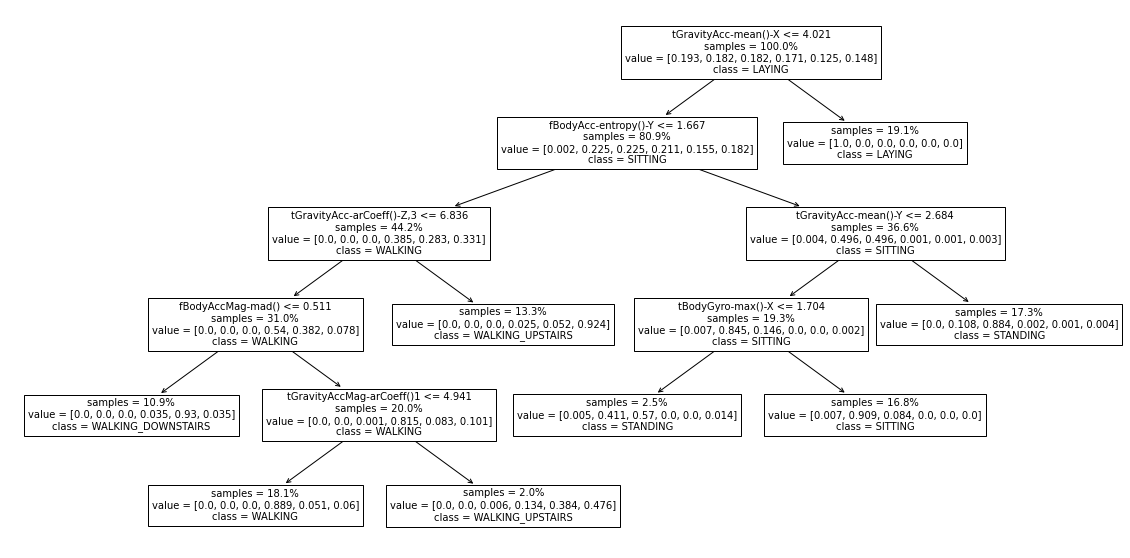

In [306]:
fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    model, 
    fontsize=10, 
    feature_names=x_selected.columns, 
    class_names=model.classes_,
    impurity=False,
    proportion=True
)

plt.show()